In [24]:
import base64
import collections
import datetime
import json
import os
import random
import time

import scipy
from scipy import ndimage
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels as sm
from pylab import rcParams
from pylab import *
from matplotlib.dates import date2num , DateFormatter
from PIL import Image

np.random.seed(1337)

%matplotlib inline
sns.set(font_scale=1.0)
rcParams['figure.figsize'] = 8, 6
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

In [25]:
from sklearn.cluster import *

# Load the Data

In [26]:
d = pd.read_json('tmp/raw_data.json')
d.index.name = 'id'
d = d[['latitude', 'longitude', 'bedrooms', 'price']]
e = pd.read_csv('tmp/features_created.csv', index_col='id')
e = e[['created_hour_of_dataset']]
d = pd.merge(d, e, how='left', left_index=True, right_index=True)
print len(d)
d.head(10)

124011


,latitude,longitude,bedrooms,price,created_hour_of_dataset
id,,,,,
0,40.7185,-73.9865,1,2950,1709.0
1,40.7278,-74.0000,2,2850,2022.0
10,40.7145,-73.9425,3,3000,2023.0
100,40.7306,-73.9890,1,3758,1516.0
1000,40.7109,-73.9571,2,3300,1710.0
10000,40.7947,-73.9667,2,5465,1740.0
100000,40.7650,-73.9845,2,4900,269.0
100001,40.7901,-73.9774,3,9000,150.0
100002,40.7730,-73.9571,2,2800,579.0


In [27]:
d.dtypes

latitude                   float64
longitude                  float64
bedrooms                     int64
price                        int64
created_hour_of_dataset    float64
dtype: object

# Try Different Clustering Algos

In [28]:
colors = {
    0: 'r',
    1: 'g',
    2: 'b',
    3: 'm',
    4: 'y',
    5: 'c',
    6: 'k'}

### K-Means

In [29]:
# e = d.sample(50000)
# clustering = sklearn.cluster.KMeans(n_clusters=80)
# clustering.fit(e[['longitude', 'latitude']])
# _ = plt.figure(figsize=(12,12))
# plt.scatter(
#     x=e.longitude,
#     y=e.latitude,
#     c=[colors[(i%7)] for i in clustering.labels_],
#     marker='+')
# _ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
# _ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Affinity Propagationm

In [30]:
# e = d.sample(3000)
# clustering = sklearn.cluster.AffinityPropagation(damping=0.5)
# clustering.fit(e[['longitude', 'latitude']])
# _ = plt.figure(figsize=(12,12))
# plt.scatter(
#     x=e.longitude,
#     y=e.latitude,
#     c=[colors[(i%7)] for i in clustering.labels_],
#     marker='+')
# _ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
# _ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Mean-Shift

In [31]:
# e = d.sample(3000)
# clustering = sklearn.cluster.MeanShift()
# clustering.fit(e[['longitude', 'latitude']])
# _ = plt.figure(figsize=(12,12))
# plt.scatter(
#     x=e.longitude,
#     y=e.latitude,
#     c=[colors[(i%7)] for i in clustering.labels_],
#     marker='+')
# _ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
# _ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Spectral Clustering

In [32]:
# e = d.sample(2000)
# clustering = sklearn.cluster.SpectralClustering(n_clusters=100)
# clustering.fit(e[['longitude', 'latitude']])
# _ = plt.figure(figsize=(12,12))
# plt.scatter(
#     x=e.longitude,
#     y=e.latitude,
#     c=[colors[(i%7)] for i in clustering.labels_],
#     marker='+')
# _ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
# _ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Agglomerative Clustering

In [33]:
# e = d.sample(20000)
# clustering = sklearn.cluster.AgglomerativeClustering(linkage='average', n_clusters=200)
# clustering.fit(e[['longitude', 'latitude']])
# _ = plt.figure(figsize=(12,12))
# plt.scatter(
#     x=e.longitude,
#     y=e.latitude,
#     c=[colors[(i%7)] for i in clustering.labels_],
#     marker='+')
# _ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
# _ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### DBSCAN

In [34]:
# e = d.sample(10000)
# clustering = sklearn.cluster.DBSCAN(eps=0.0015, n_jobs=4)
# clustering.fit(e[['longitude', 'latitude']])
# _ = plt.figure(figsize=(12,12))
# plt.scatter(
#     x=e.longitude,
#     y=e.latitude,
#     c=[colors[(i%7)] for i in clustering.labels_],
#     marker='+')
# _ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
# _ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Birch

In [35]:
# e = d.sample(10000)
# clustering = sklearn.cluster.Birch(threshold=0.001, n_clusters=100)
# clustering.fit(e[['longitude', 'latitude']])
# _ = plt.figure(figsize=(12,12))
# plt.scatter(
#     x=e.longitude,
#     y=e.latitude,
#     c=[colors[(i%7)] for i in clustering.labels_],
#     marker='+')
# _ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
# _ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

# K-Means Clustering

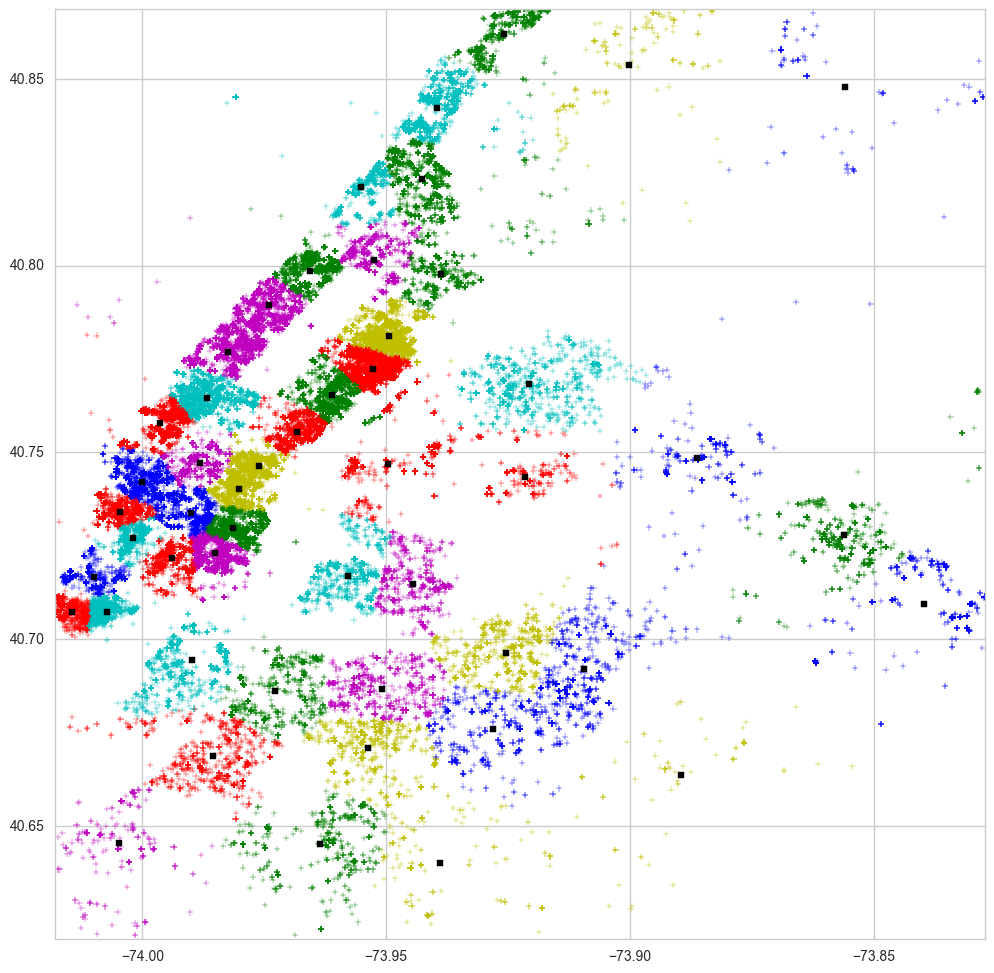

In [36]:
NUM_CLUSTERS = 50
lon_q1 = d.longitude.quantile(0.005)
lon_q99 = d.longitude.quantile(0.995)
lat_q1 = d.latitude.quantile(0.005)
lat_q99 = d.latitude.quantile(0.995)
e = d[((d.longitude >= lon_q1) &
       (d.longitude <= lon_q99) &
       (d.latitude >= lat_q1) &
       (d.latitude <= lat_q99))]#.sample(50000)
clustering = sklearn.cluster.KMeans(n_clusters=NUM_CLUSTERS)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%6)] for i in clustering.labels_],
    marker='+')
plt.scatter(
    x=clustering.cluster_centers_[:,0],
    y=clustering.cluster_centers_[:,1],
    c='k',
    marker=',')
_ = plt.xlim((lon_q1, lon_q99))
_ = plt.ylim((lat_q1, lat_q99))

In [37]:
d['cluster_id'] = NUM_CLUSTERS
d.loc[((d.longitude >= lon_q1) &
       (d.longitude <= lon_q99) &
       (d.latitude >= lat_q1) &
       (d.latitude <= lat_q99)), 'cluster_id'] = clustering.labels_

# Cluster Size

In [38]:
cnt = collections.Counter(d.cluster_id)
d['cluster_size'] = d.cluster_id.map(cnt).astype(float64)

# Distance from Centroid

In [39]:
centroids = pd.DataFrame(clustering.cluster_centers_)
centroids = pd.concat([centroids,pd.DataFrame({0: [-73.95], 1: [40.75]}, index=[NUM_CLUSTERS])])
dc = pd.merge(d, centroids, left_on='cluster_id', right_index=True)
d['distance_cc'] = np.power(
    (np.power((dc.longitude - dc[0]), 2.0) +
    np.power((dc.latitude - dc[1]), 2.0)),
    0.5)

# Price Quantile

In [40]:
d['price_clust_br_q'] = np.nan
for cid in d.cluster_id.unique():
    for b in d[d.cluster_id == cid].bedrooms.value_counts().index:
        l = len(d[((d.bedrooms == b) & (d.cluster_id == cid))])
        d.loc[((d.bedrooms == b) & (d.cluster_id == cid)), 'price_clust_br_q'] = (
            d[((d.bedrooms == b) & (d.cluster_id == cid))].price.rank() / l)
d[((d.bedrooms == 1) & (d.cluster_id == 1))].head(20)

,latitude,longitude,bedrooms,price,created_hour_of_dataset,cluster_id,cluster_size,distance_cc,price_clust_br_q
id,,,,,,,,,
100116,40.7703,-73.9592,1,2700,555.0,1,4633.0,0.005183,0.380886
100162,40.7631,-73.9581,1,2000,219.0,1,4633.0,0.003819,0.079877
100237,40.7676,-73.9577,1,2700,338.0,1,4633.0,0.004002,0.380886
100267,40.7677,-73.9616,1,3550,675.0,1,4633.0,0.002283,0.683296
100278,40.7633,-73.9628,1,3200,555.0,1,4633.0,0.002766,0.572870
10043,40.7659,-73.9574,1,2200,1806.0,1,4633.0,0.003715,0.161435
100455,40.7679,-73.9598,1,3500,555.0,1,4633.0,0.002747,0.660314
100484,40.7675,-73.9607,1,3500,339.0,1,4633.0,0.002063,0.660314
100538,40.7661,-73.9636,1,6900,49.0,1,4633.0,0.002586,0.988509


# Area Related Features

In [41]:
MAX_LATLON_DIFF = 0.005
MAX_TIME_DIFF = 24*7
def area_features(r):
    a = d[((abs(d.latitude - r['latitude']) <= MAX_LATLON_DIFF) &
                  (abs(d.longitude - r['longitude']) <= MAX_LATLON_DIFF))].copy()
        
    area_apts = a[(a.bedrooms == r['bedrooms'])]
        
    area_apts_time = a[((abs(a.created_hour_of_dataset - r['created_hour_of_dataset']) <= MAX_TIME_DIFF) &
                       (a.bedrooms == r['bedrooms']))]
    
    af = {}
    
    af['area_density'] = len(area_apts)
    
    af['area_distance_com'] = pow(
        pow(a.latitude.mean() - r['latitude'], 2.0) +
        pow(a.longitude.mean() - r['longitude'], 2.0), 0.5)
    
#     af['price_area_q'] = (
#         1.0 * len(area_apts[area_apts.price <= r['price']]) /
#         len(area_apts))
#     af['price_area_time_q'] = (
#         1.0 * len(area_apts_time[area_apts_time.price <= r['price']]) /
#         len(area_apts_time))
    
    return pd.Series(af)

e = d.apply(area_features, axis=1)
d = pd.concat([d, e], axis=1)

# Save the Data

In [43]:
del d['bedrooms']
del d['price']
del d['created_hour_of_dataset']

In [44]:
d.to_csv('tmp/features_latlon.csv')